# Titanic - Machine Learning from Disaster - agodwinp

These is my ideas around investigating the Titanic dataset using Machine Learning

First, I redefine the problem statement and attempt to critically analyse the question at hand. Then I will gain some context and understanding to the problem, by taking a closer look at the features.

# 1
### Problem Statement

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Survival rate = 32%.

The aim of this exercise is to use Machine Learning to correctly predict the greatest percentage of observations from the test sample. I will train a model using the 'train' dataset, listing passengers who survived and did not survive the disaster. This trained model will then be put to the test against an unseen test sample called 'test'.

As with all exercises of this nature, understanding of the event and context is key. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Throughout this analysis I will aim to extrapolate more statistically relevant information like this. Enjoy!

# 2
### Importing Packages

Now I will load the relevant packages. Pandas is used for data manipulation and to allow us to acquire our data into Pandas DataFrames. NumPy is used for mathematical programming and use of large arrays and matrices. 

Seaborn and MatPlotLib are used for visualisations.

In [55]:
# Packages for data manipulation and computation 

import pandas as pd
import numpy as np

# Packages for visualisation

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, palette = "pastel")

# 3
### Acquiring the Data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [56]:
# Comment out these statements to read data on Windows
raw_train = pd.read_csv('C:/Users/I308570/Kaggle/Titanic - Machine Learning from Disaster/Data/train.csv')
raw_test = pd.read_csv('C:/Users/I308570/Kaggle/Titanic - Machine Learning from Disaster/Data/test.csv')

# Comment out these statements to read data on Mac
#raw_train = pd.read_csv('/Users/Arun/Documents/Documents/Kaggle/Titanic - Machine Learning from Disaster/train.csv')
#raw_test = pd.read_csv('/Users/Arun/Documents/Documents/Kaggle/Titanic - Machine Learning from Disaster/test.csv')

full = raw_train.append(raw_test, ignore_index=True)

train = full[:891]
test = full[891:]

print('Datasets \nfull: ', full.shape, '\ntest: ', test.shape, '\ntrain: ', train.shape)


Datasets 
full:  (1309, 12) 
test:  (418, 12) 
train:  (891, 12)


Now that the data is ready in DataFrames, let's take a look at it.

In [57]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


For further understanding, below are the descriptions for each of the features:

### Variable Descriptions

1. Age = age of passenger in years
2. Cabin = cabin number
3. Embarked = port of embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton )
4. Fare = passenger fare
5. Name = name of passenger
6. Parch = number of parents/children aboard
7. PassengerId = ID column, one unique ID per passenger
8. Pclass = ticket class
9. Sex = gender
10. Sibsp = number of siblings/spouses aboard
11. Survived = did the passenger survive? ( 1 = survived, 0 = did not survive )
12. Ticket = ticket number

#### *Variable Notes*

pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# 4
### Analysing the features

With this context, let's understand the representations of these columns. This can help to guide us as we move forward.

In [58]:
print(full.columns.values)

['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket']


It is important to understand which features have missing values, so that we can handle these missing values or decide whether to exclude these features.

# 4 a)

### *Missing Values*

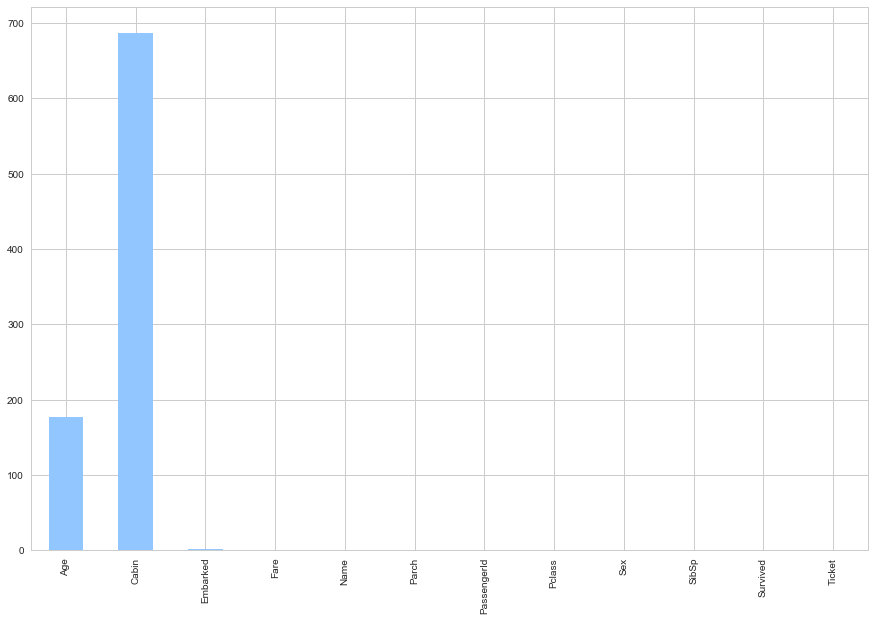

In [59]:
plt.subplots(figsize =(15, 10))
train.isnull().sum().plot(kind='bar');

From this, we can see that Cabin and Age have a significant number of missing values. The decision now must be made to replace these with a value, or to exclude this feature completely.

To continue our analysis, let's look at the datatypes for each of the features.

# 4 b)

### *Data Types*

In [60]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
Age            332 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 n

We can see that for the training sample, we have 3 floating numbers, 4 integers and 5 categorical variables. The only difference for the test sample is that the survived column is missing, which is intended.

# 4 c)

### *Data Overview*

Now let's take a look at some descriptive attributes of the features.

In [61]:
train.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,714.000000,204,889,891.000000,891,891.000000,891.000000,891.000000,891,891.000000,891.000000,891
unique,NaN,147,3,NaN,891,NaN,NaN,NaN,2,NaN,NaN,681
top,NaN,B96 B98,S,NaN,"Hood, Mr. Ambrose Jr",NaN,NaN,NaN,male,NaN,NaN,1601
freq,NaN,4,644,NaN,1,NaN,NaN,NaN,577,NaN,NaN,7
mean,29.699118,NaN,NaN,32.204208,NaN,0.381594,446.000000,2.308642,NaN,0.523008,0.383838,NaN
std,14.526497,NaN,NaN,49.693429,NaN,0.806057,257.353842,0.836071,NaN,1.102743,0.486592,NaN
min,0.420000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,20.125000,NaN,NaN,7.910400,NaN,0.000000,223.500000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,446.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,38.000000,NaN,NaN,31.000000,NaN,0.000000,668.500000,3.000000,NaN,1.000000,1.000000,NaN


We can see that:

- Age: 715 complete entries leabing 177 missing values, the mean age was 29 and the max was 80. Looking at the lower quartile, median and upper quartile, we can see that this feature is positively skewed, with more weighting towards the lower ages.
- Cabin: There was 147 unique cabins in the dataset but a lot of missing values. The cabin which appeared the most number of times was G6.
- Embarked: There were 3 categories for this variable, Southampton being the most popular appearing 644 times.
- Fare: No missing values, the mean was £32. This feature is very positively skewed with a max value of 512, perhaps this was for the very high class tickets, or maybe this is an outlier.
- Parch: This tells us that some people travelled with no parents or children. In fact this was true for a very large % of the passengers, as we can see the UQ = 0. However, the max for this feature is 6, indicating a large family.
- PassengerId: This doesn't tell us much as this is a unique ID for each passenger
- Pclass: This is a categorical variable and looking at the mean, this tells us that most people would have travelled 2nd or 3rd class, this is justified by looking at the LQ, Median and UQ. The median is 3, indicating that over half of the passengers travelled 3rd class.
- Sibsp: This, alongside Parch tells us that some people travelled alone, but specifically for Sibsp, this tell us that most people travelled without any siblings or spouses, only a small % of people travelled with one, and the max value here was 8, perhaps indicating a large family or brothers ofr sisters.
- Survived: This is our categorical target variable, all this is useful to show is that there are 2 categories, survived or didnt survive.
- Ticket: Interestingly there are less unique tickets than passengers, and one ticket appears 7 times, this may be due to a family buing a ticket for 7 people perhaps, or fraud.

To start my statistical analysis of the features, I like to understand which features are most important. This helps to give direction to my analysis. Hence, I first like to plot the correlations of the features, as shown below.

# 4 d)

### *Correlations*

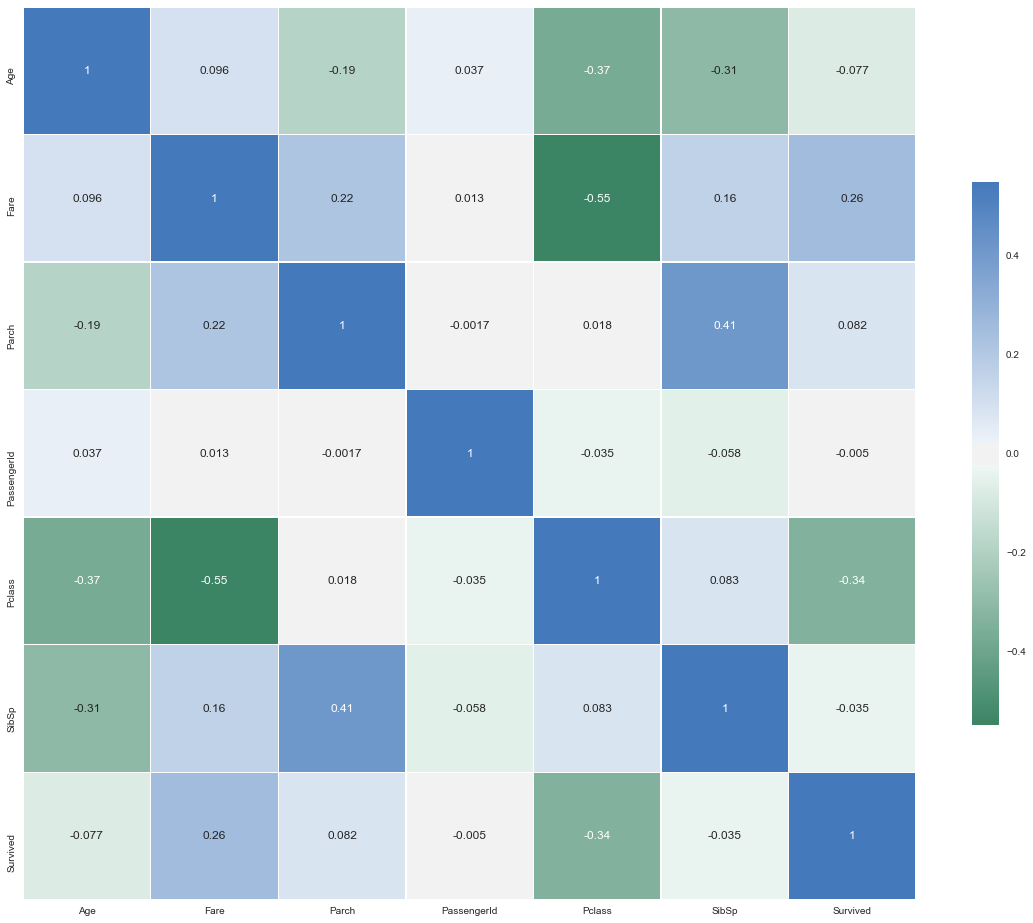

In [62]:
corr = train.corr()
plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);

As you can see, this produces a plot for just the numerical columns. There are some additional features that we may extract that I'd like to analyse in this way, so we will re-run this plot after we have completed feature engineering. 

For now, we can see that in regards to survival, fare and class seem to have a high correlation. Therefore, I will investigate these further. The other features so far do not have a significant correlation with survival, so I will investigate these independant of survival.

# 4 e)
### *Exploratory Analysis*

First, let's look at fare and class with survival.

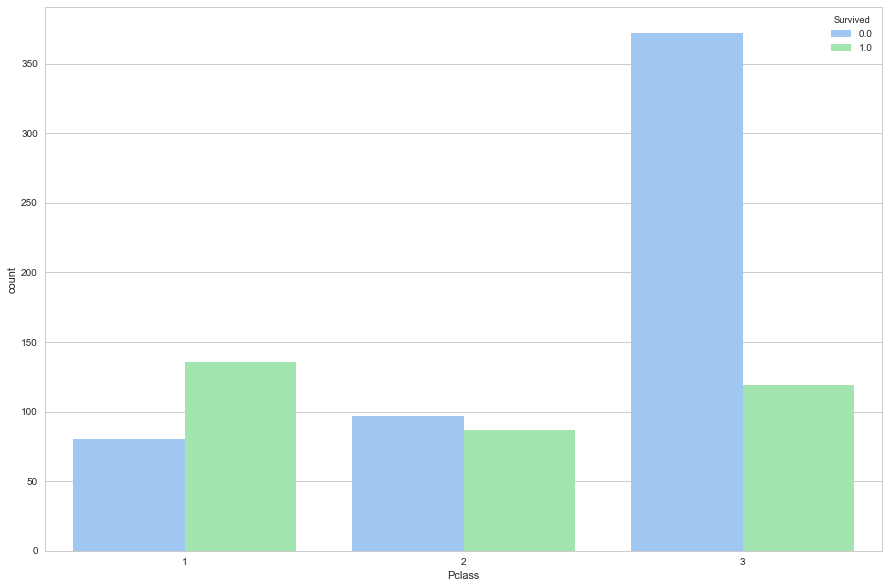

In [63]:
plt.subplots(figsize =(15, 10))
sns.countplot(x="Pclass", hue = "Survived", data=train);

We know that class is correlated with survival, and here we can see that the number of people surviving from each class differs. The most amount of deaths came from 3rd class and the least came from 1st. The most amount of survivors came from 1st class, and the least actually from 2nd. Perhaps it was not worth buying a second class ticket?...

Now let's investigate the features which have a correlation with class, alongside survival. From the correlation plot, these features are age and fare. 

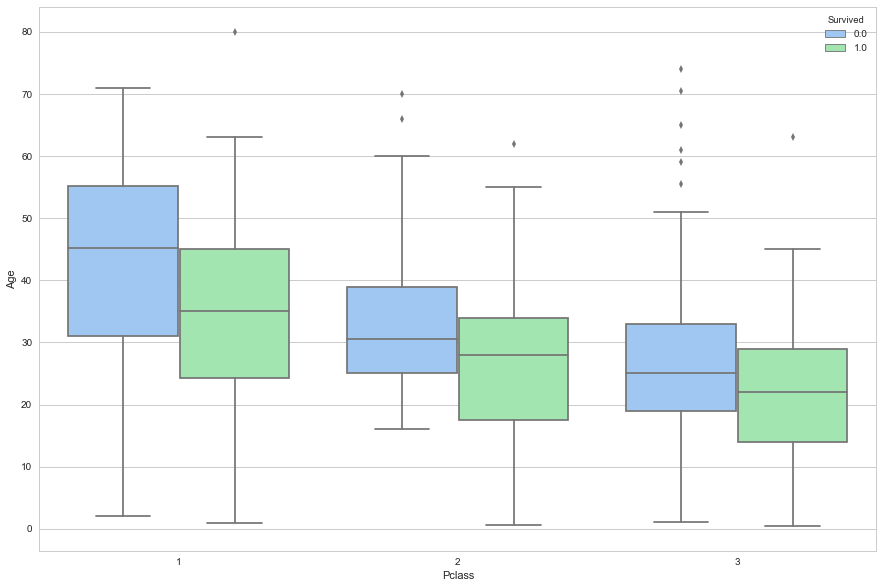

In [64]:
plt.subplots(figsize =(15, 10))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=train);

Here we can see that the average age decreases as we go down the classes, for both survival and death. This shows that if you were an older person, you would have a very low chance of survival in 3rd or 2nd class.

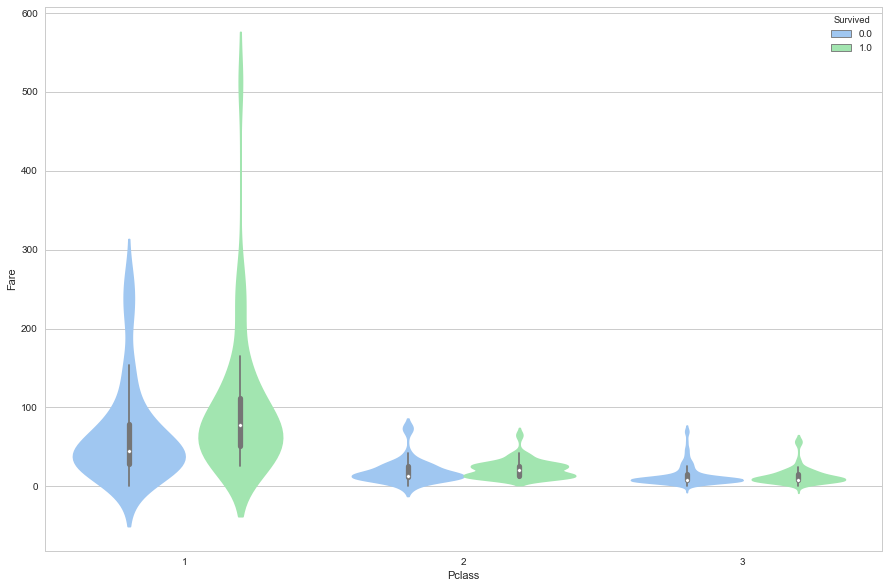

In [65]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=train);

This plot shows us that the distribution of fares was significantly larger in 1st class than any other class. Some people that paid for a 3rd or 2nd class ticket, may have paid the same amount as a 1st class one. This also shows that across the classes, on average the more paid for a ticket, the greater the chance of survival. We can also see some extreme fares in 1st class, which seem extraordinary.

From this analysis on class we have seen:
- The lower the class, the greater number of deaths.
- The higher the class, the greater number of survivors, however 3rd class had more survivors than 2nd class.
- The average age of survivors and non-survivors decreased from 1st to 3rd class. The spread of ages also decreased as we went down the classes.
- As well as the age being greater for 1st class, so was the spread and average fare price. There were some extreme values here in 1st class, but some 1st class tickets were the same price as 2nd and 3rd class tickets. 
- Interestingly, the plot shows that on average, the survivors paid more for their tickets.

Now let's investigate fare.

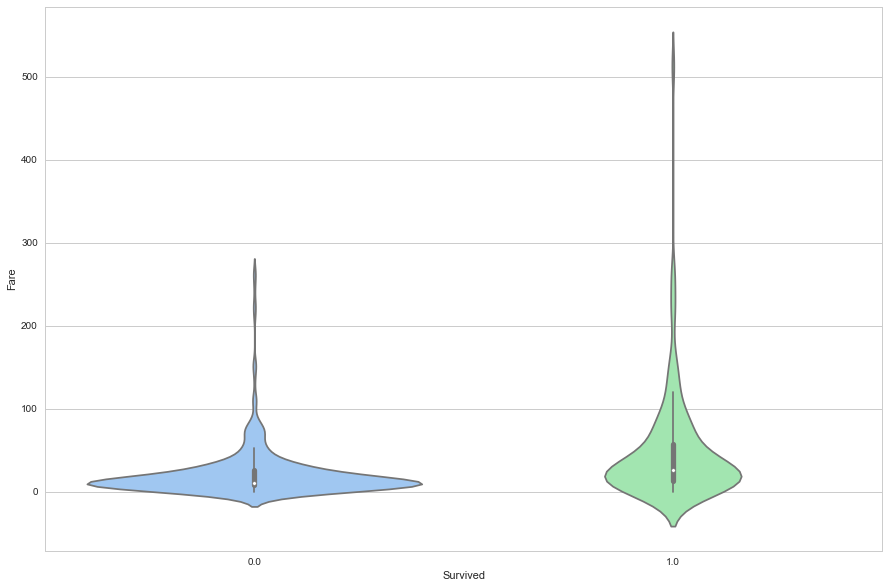

In [66]:
plt.subplots(figsize =(15, 10))
sns.violinplot(x="Survived", y="Fare", data=train);

We know that this variable is negatively skewed since the mean > median. This graph supports the above descriptive table, telling us that the largest distribution of fares was towards the cheaper end of the scale. Whereas there were a few passengers that paid a large sum.

Let's see how this changes with survival.

We can see that survivors on average paid more, and the fare was more widely distributed. Wheread among the non-survivors, they predominantly paid a low fee for their ticket.

Now let's take a look at some of the correlating variables with fare, siblings + spouses and parents + children. I won't revisit class now since we looked at this before

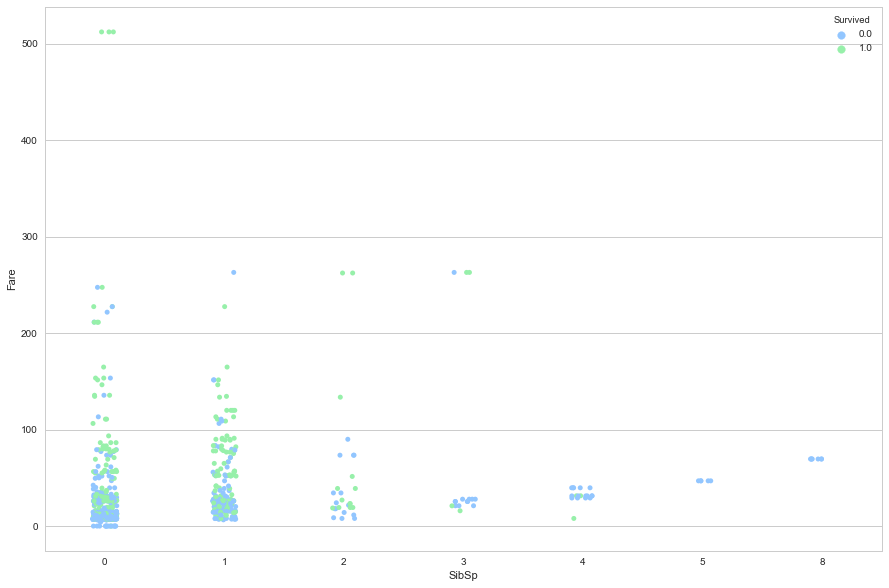

In [67]:
plt.subplots(figsize =(15, 10))
sns.stripplot(x="SibSp", y="Fare", data=train, size = 5, jitter = True, hue="Survived");

We can see that the largest number of passengers had either 0 or 1 sibling/spouse. This shows that the majority of people either travelled alone, or with a partner perhaps. 

Furthermore, as the number of siblings/spouses increased to between 4-8, the average fare increased. The opposite of economies of scale... 

It doesn't look like many passengers from 3-8 siblings/spouses survived at all, but the ones that did survive tended to have paid a slightly higher price than the ones that didn't survive. This wasnt the case for all survivors however. 

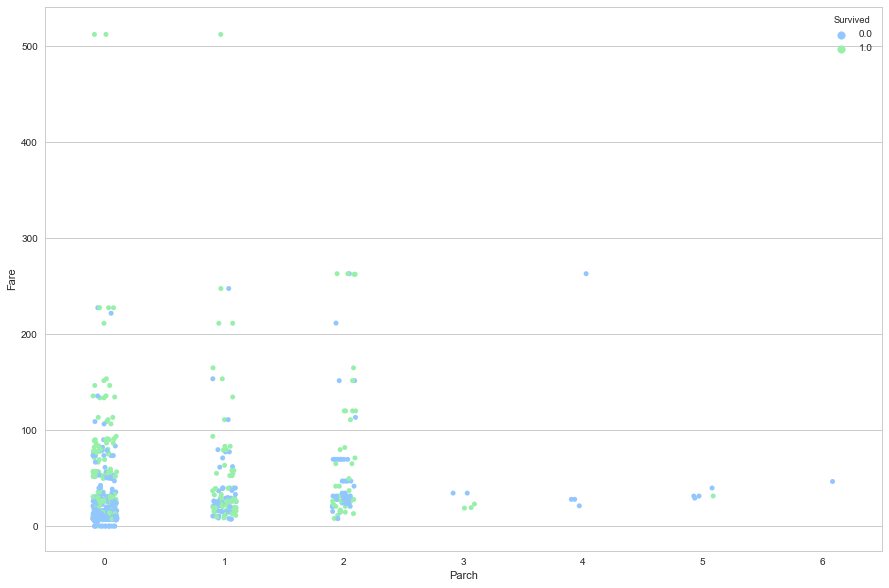

In [68]:
plt.subplots(figsize =(15, 10))
sns.stripplot(x="Parch", y="Fare", data=train, size = 5, jitter = True, hue="Survived");

Here we can see that most passengers had between 0 and 2 parents and children. Of the survivors, they mostly travelled alone or with just 1 other person.

Parties with 3 or more parents/children did not have great chances of survival.

To summarise my findings with fare:
- On average, survivors paid more than non-survivors and the spread of fares was larger for survivors.
- For passengers that travelled with children, spouses or family, the survivors' fares were higher than non-survivors also.

We have investigated some of the important features within this dataset. From this I can say that we can extract a lot of additioanl features from these. For the categorical variables such as SibSp, Pclass and Parch, I will create dummy variables.

I would also like to cross these variables to see how these perform.

Furthermore, I will create a binary variable from Sex and dummy variables from Embarked, in order to see how these correlates with the features. I believe that Sex especially will have a large effect on survival, so before I create this new variable, lets visualise these effect the features we have looked at so far.

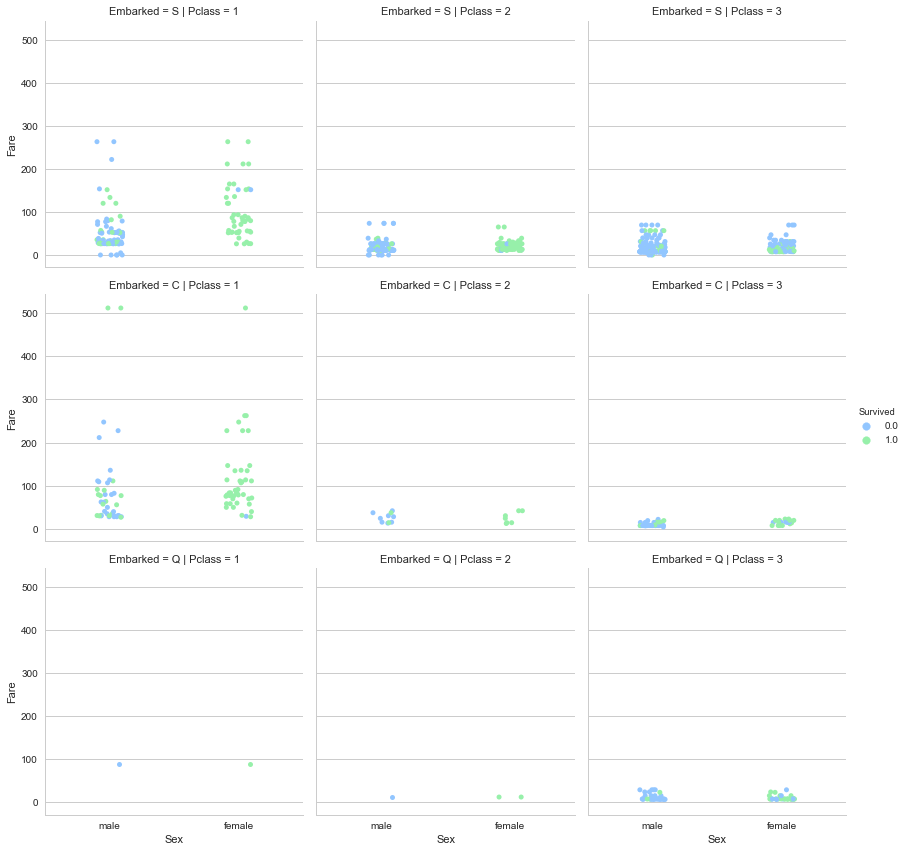

In [69]:
sns.factorplot(x="Sex", y="Fare", hue="Survived", col = "Pclass", row="Embarked", data=train, kind="strip", jitter = True);

As expected, Sex has an influence on survival. We can see that across classes, Females had a better rate of survival than males. Therefore, this is an important feature to capture. 

Another feature to capture is embarked, since from this plot, we can see the rates of survival differ. Interestingly, the most survivors that embarked from Queenstown were in 3rd class.

In [70]:
#grid = sns.FacetGrid(train, col='Survived', row='Pclass', hue = "Sex", size=4, aspect=1.6)
#grid.map(plt.hist, 'Age', alpha=.5, bins=20)
#grid.add_legend();

# 5
### Feature Engineering

From analysing the dataset, we have discovered that there are definitely some features that we can extract from the columns. 

Using the analysis and intuition, we want to:
1. Create dummy variables from SibSp, Parch, Pclass
2. Create a binary variable from Sex
3. Create 'lone traveller' and 'family' features
4. Remove Cabin and PassengerId
5. Create Title feature from Name
6. Create dummy variables from Embarked
7. Possibly remove Ticket
8. Bucket Age and Fare
9. Investigate which features to make interaction variables from

Firstly, I created a dummy variable to represent each of the different passenger classes on board. These features include a simple True/False which is viewed by pd as a 1/0

In [71]:
cat_names = {1:'First Class', 2:'Second Class', 3:'Third Class'}
for elem in full['Pclass'].unique():
    full[cat_names[elem]] = full['Pclass'] == elem
    
full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,True,False,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,False,True,False
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,True,False,False


Next, I created a feature to represent family size, encoding Parch and SibSp into one column. Using family size, I can then determine whether a traveller was alone or in a group

In [72]:
full['Family Size'] = full['SibSp'] + full['Parch'] + 1

full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class,Family Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,True,False,False,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,False,True,False,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,True,False,False,1


I wanted to further encode Parch and SibSp into more detailed features. I decided to create binary features indicating exactly whether someone was travelling with parents/children or siblings/spouses.

In [73]:
def NoParentsorKids(row):
    if row['Parch'] == 0:
        val = 1
    else:
        val = 0
    return val

full['No Parents or Children'] = full.apply(NoParentsorKids, axis=1)

full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class,Family Size,No Parents or Children
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,True,False,False,2,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,False,True,False,2,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,True,False,False,1,1


In [74]:
def NoSibsorSpouse(row):
    if row['SibSp'] == 0:
        val = 1
    else:
        val = 0
    return val

full['No Siblings or Spouse'] = full.apply(NoSibsorSpouse, axis=1)

full.tail(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class,Family Size,No Parents or Children,No Siblings or Spouse
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,True,False,False,1,1,1
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,True,False,False,1,1,1
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,True,False,False,3,0,0


Using the family size feature, where = 1, this now indicates whether a traveller was alone. I believe this could be an interesting variable in modelling, so I have included this as its own feature.

In [75]:
def LoneTraveller(row):
    if row['Family Size'] == 1:
        val = 1
    else:
        val = 0
    return val

full['Lone Traveller'] = full.apply(LoneTraveller, axis=1)

full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class,Family Size,No Parents or Children,No Siblings or Spouse,Lone Traveller
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,True,False,False,2,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,False,True,False,2,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,True,False,False,1,1,1,1


I now wanted to convert a categorical variable, "Sex", into a numerical categorical variable. For this, I used a simple dictionary and replace.

Now:
- Males = 1
- Females = 0

In [76]:
Gender = {"Sex": {"male": 1, "female": 0}}

full.replace(Gender, inplace=True)
full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Third Class,First Class,Second Class,Family Size,No Parents or Children,No Siblings or Spouse,Lone Traveller
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,True,False,False,2,1,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,False,True,False,2,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,True,False,False,1,1,1,1


### Extracting Title from Name

Using extract, I wanted to create a new feature representing the title of the passenger. However, some titles were so obscure that they may not be useful in the analysis, so I proceeded to replace some with equivalent titles.

In [77]:
full['Title'] = full['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
pd.crosstab(full['Sex'], full['Title'])

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
1,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [78]:
full['Title'] = full['Title'].replace('Mlle', 'Miss')
full['Title'] = full['Title'].replace('Ms', 'Miss')
full['Title'] = full['Title'].replace('Mme', 'Mrs')

pd.crosstab(full['Sex'], full['Title'])

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mr,Mrs,Rev,Sir
Sex,,,,,,,,,,,,,,,
0,0,0,1,0,1,1,0,1,0,0,264,0,198,0,0
1,1,4,0,1,0,7,1,0,2,61,0,757,0,8,1


In [79]:
cat_names = {'Capt':'Captain', 'Col':'Colonel', 'Countess':'Countess', 'Don':'Don', 'Dona':'Dona',
            'Dr':'Doctor', 'Jonkheer':'Jonkheer', 'Lady':'Lady', 'Major':'Major', 'Master':'Master', 
            'Miss':'Miss', 'Mr':'Mr', 'Mrs':'Mrs', 'Rev':'Reverend', 'Sir':'Sir'}

for elem in full['Title'].unique():
    full[cat_names[elem]] = full['Title'] == elem
  
full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Reverend,Doctor,Major,Lady,Sir,Colonel,Captain,Countess,Jonkheer,Dona
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,False,False,False,False,False,False,False,False,False,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,False,False,False,False,False,False,False,False,False,False
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,False,False,False,False,False,False,False,False,False,False


Some of these titles were very rare, so I grouped them together using the below classifications, and deleted the existing dummy variables. I also thought that combining the family size feature and gender would make for an interesting feature representing single males and females.

In [80]:
def MilRank(row):
    if row['Title'] == 'Capt':
        val = 1
    elif row['Title'] == 'Col':
        val = 1
    elif row['Title'] == 'Major':
        val = 1
    else:
        val = 0
    return val

full['Ranked Military'] = full.apply(MilRank, axis=1)

def Noble(row):
    if row['Title'] == 'Countess':
        val = 1
    elif row['Title'] == 'Jonkheer':
        val = 1
    elif row['Title'] == 'Lady':
        val = 1
    else:
        val = 0
    return val

full['Nobility'] = full.apply(Noble, axis=1)

def SWoman(row):
    if row['Title'] == 'Miss' and row['Family Size'] == 1:
        val = 1
    else:
        val = 0
    return val

full['Single Woman'] = full.apply(SWoman, axis=1)

def SMan(row):
    if row['Title'] == 'Mr' and row['Family Size'] == 1:
        val = 1
    elif row['Title'] == 'Master' and row['Family Size'] == 1:
        val = 1
    else:
        val = 0
    return val

full['Single Man'] = full.apply(SMan, axis=1)

full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sir,Colonel,Captain,Countess,Jonkheer,Dona,Ranked Military,Nobility,Single Woman,Single Man
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,False,False,False,False,False,False,0,0,0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,False,False,False,False,False,False,0,0,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,False,False,False,False,False,False,0,0,1,0


I then wanted to investigate some of the missing values, as this may cause problems when modelling. Embarked had some missing values. Instead of making assumptions on the data, which could skew the results, I thought it'd be appropriate to highlight the fact in the data that this value is missing. Hence, I replaced missing values for Embarked with Unknown.

In [81]:
full['Embarked'].fillna('Unknown', inplace=True)

In [82]:
full.Embarked.unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [83]:
cat_names = {'S':'Embarked Southampton', 'Q':'Embarked Queenstown', 'C':'Embarked Cherbourg', 'Unknown':'Embarked Unknown'}
for elem in full['Embarked'].unique():
    full[cat_names[elem]] = full['Embarked'] == elem

full.head(n=3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Jonkheer,Dona,Ranked Military,Nobility,Single Woman,Single Man,Embarked Southampton,Embarked Cherbourg,Embarked Queenstown,Embarked Unknown
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,False,False,0,0,0,0,True,False,False,False
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,False,False,0,0,0,0,False,True,False,False
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,False,False,0,0,1,0,True,False,False,False


In [84]:
print(full.columns.values)

['Age' 'Cabin' 'Embarked' 'Fare' 'Name' 'Parch' 'PassengerId' 'Pclass'
 'Sex' 'SibSp' 'Survived' 'Ticket' 'Third Class' 'First Class'
 'Second Class' 'Family Size' 'No Parents or Children'
 'No Siblings or Spouse' 'Lone Traveller' 'Title' 'Mr' 'Mrs' 'Miss'
 'Master' 'Don' 'Reverend' 'Doctor' 'Major' 'Lady' 'Sir' 'Colonel'
 'Captain' 'Countess' 'Jonkheer' 'Dona' 'Ranked Military' 'Nobility'
 'Single Woman' 'Single Man' 'Embarked Southampton' 'Embarked Cherbourg'
 'Embarked Queenstown' 'Embarked Unknown']


As you can see, we now have a lot of features, of which some can be removed. The below code shows which features I removed and how I did it.

In [85]:
columns = ['Cabin', 'Embarked', 'Parch', 'PassengerId', 'SibSp', 'Ticket', 'Title', 'Captain',
          'Colonel', 'Major', 'Jonkheer', 'Countess', 'Lady', 'Name', 'Pclass']
full.drop(columns, inplace=True, axis=1)

print(full.columns.values)

['Age' 'Fare' 'Sex' 'Survived' 'Third Class' 'First Class' 'Second Class'
 'Family Size' 'No Parents or Children' 'No Siblings or Spouse'
 'Lone Traveller' 'Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Reverend' 'Doctor'
 'Sir' 'Dona' 'Ranked Military' 'Nobility' 'Single Woman' 'Single Man'
 'Embarked Southampton' 'Embarked Cherbourg' 'Embarked Queenstown'
 'Embarked Unknown']


We know that Age and Fare are interesting features. But to increase their predictive power and give more directed insight, it was useful to bucket these features and represent these bands with a numerical category.

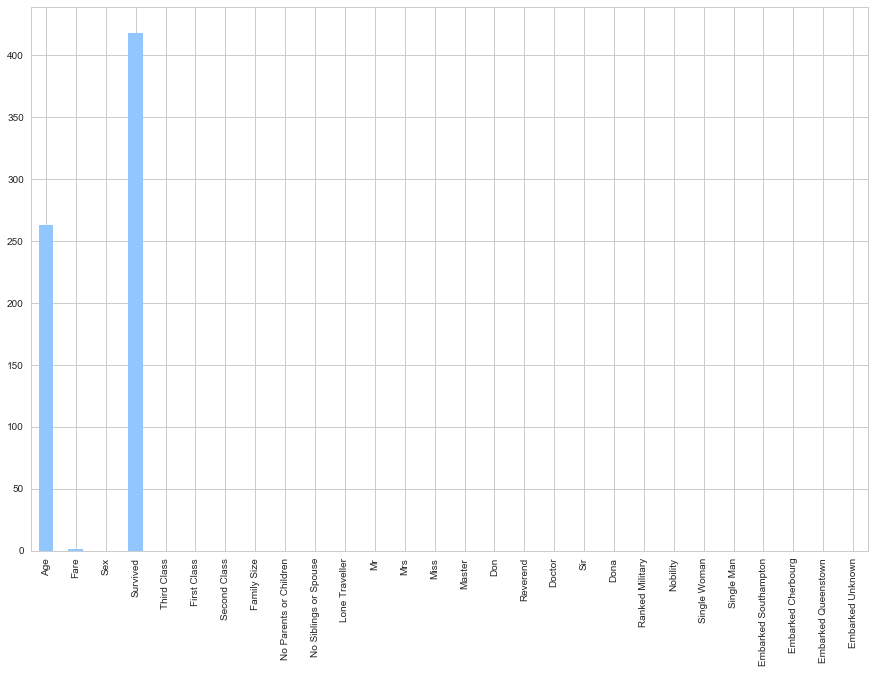

In [86]:
plt.subplots(figsize =(15, 10))
full.isnull().sum().plot(kind='bar');

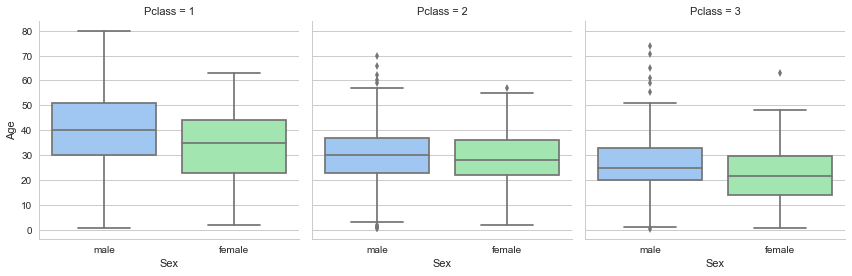

In [87]:
sns.factorplot(x="Sex", y="Age", col = "Pclass", data=train, kind="box");

In [88]:
np.std(full['Age'])

14.406601748667835

# Handle missing values for Age and Fare

In [89]:
full['Age'].fillna(full['Age'].mean(), inplace=True)

In [90]:
full['Age Band'] = pd.cut(full['Age'], 5)
full[['Age Band', 'Survived']].groupby(['Age Band'], as_index=False).mean().sort_values(by='Age Band', 
                                                                                          ascending=True)

,Age Band,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80]",0.090909


In [91]:
full['Age Band'] = full['Age Band'].replace('(0.0902, 16.136]', 1)
full['Age Band'] = full['Age Band'].replace('(16.136, 32.102]', 2)
full['Age Band'] = full['Age Band'].replace('(32.102, 48.068]', 3)
full['Age Band'] = full['Age Band'].replace('(48.068, 64.034]', 4)
full['Age Band'] = full['Age Band'].replace('(64.034, 80]', 5)

full.head(n=3)

,Age,Fare,Sex,Survived,Third Class,First Class,Second Class,Family Size,No Parents or Children,No Siblings or Spouse,...,Dona,Ranked Military,Nobility,Single Woman,Single Man,Embarked Southampton,Embarked Cherbourg,Embarked Queenstown,Embarked Unknown,Age Band
0,22.0,7.2500,1,0.0,True,False,False,2,1,0,...,False,0,0,0,0,True,False,False,False,2
1,38.0,71.2833,0,1.0,False,True,False,2,1,0,...,False,0,0,0,0,False,True,False,False,3
2,26.0,7.9250,0,1.0,True,False,False,1,1,1,...,False,0,0,1,0,True,False,False,False,2


In [92]:
full['Fare'].fillna(full['Fare'].mean(), inplace=True)

In [93]:
full['Fare Band'] = pd.qcut(full['Fare'], 4)
full[['Fare Band', 'Survived']].groupby(['Fare Band'], as_index=False).mean().sort_values(by='Fare Band', 
                                                                                          ascending=True)

,Fare Band,Survived
0,"[0, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.275]",0.441048
3,"(31.275, 512.329]",0.600000


In [94]:
full['Fare Band'] = full['Fare Band'].replace('[0, 7.896]', 1)
full['Fare Band'] = full['Fare Band'].replace('(7.896, 14.454]', 2)
full['Fare Band'] = full['Fare Band'].replace('(14.454, 31.275]', 3)
full['Fare Band'] = full['Fare Band'].replace('(31.275, 512.329]', 4)

full.head(n=3)

,Age,Fare,Sex,Survived,Third Class,First Class,Second Class,Family Size,No Parents or Children,No Siblings or Spouse,...,Ranked Military,Nobility,Single Woman,Single Man,Embarked Southampton,Embarked Cherbourg,Embarked Queenstown,Embarked Unknown,Age Band,Fare Band
0,22.0,7.2500,1,0.0,True,False,False,2,1,0,...,0,0,0,0,True,False,False,False,2,1
1,38.0,71.2833,0,1.0,False,True,False,2,1,0,...,0,0,0,0,False,True,False,False,3,4
2,26.0,7.9250,0,1.0,True,False,False,1,1,1,...,0,0,1,0,True,False,False,False,2,2


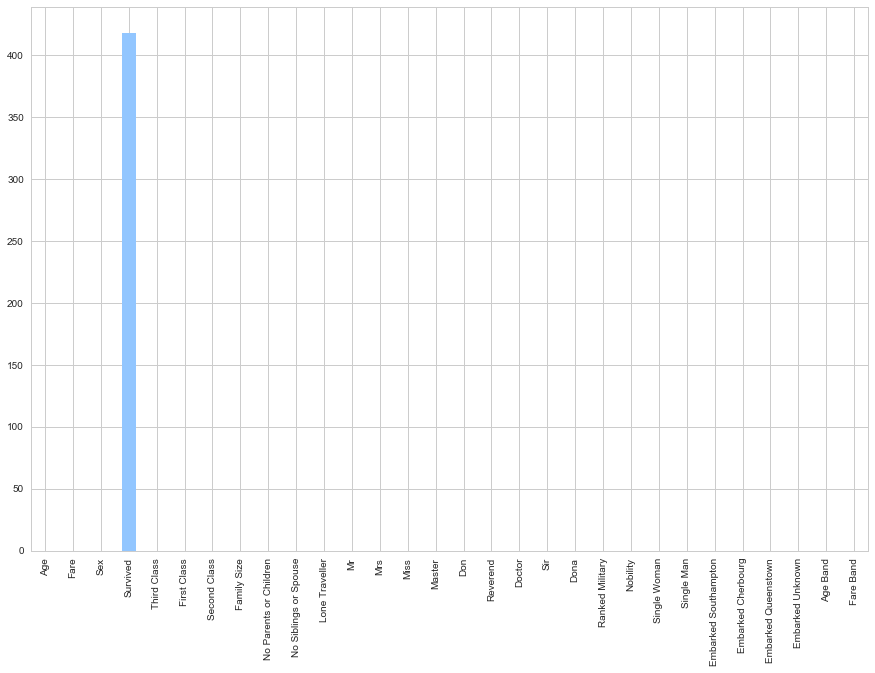

In [95]:
plt.subplots(figsize =(15, 10))
full.isnull().sum().plot(kind='bar');

Now that almost all the features that I wanted to test have been created, I will run the correlations again to see how they affect survival and whether there are any potential leaker variables. This will also give guidance to understanding whether the features created were useful.

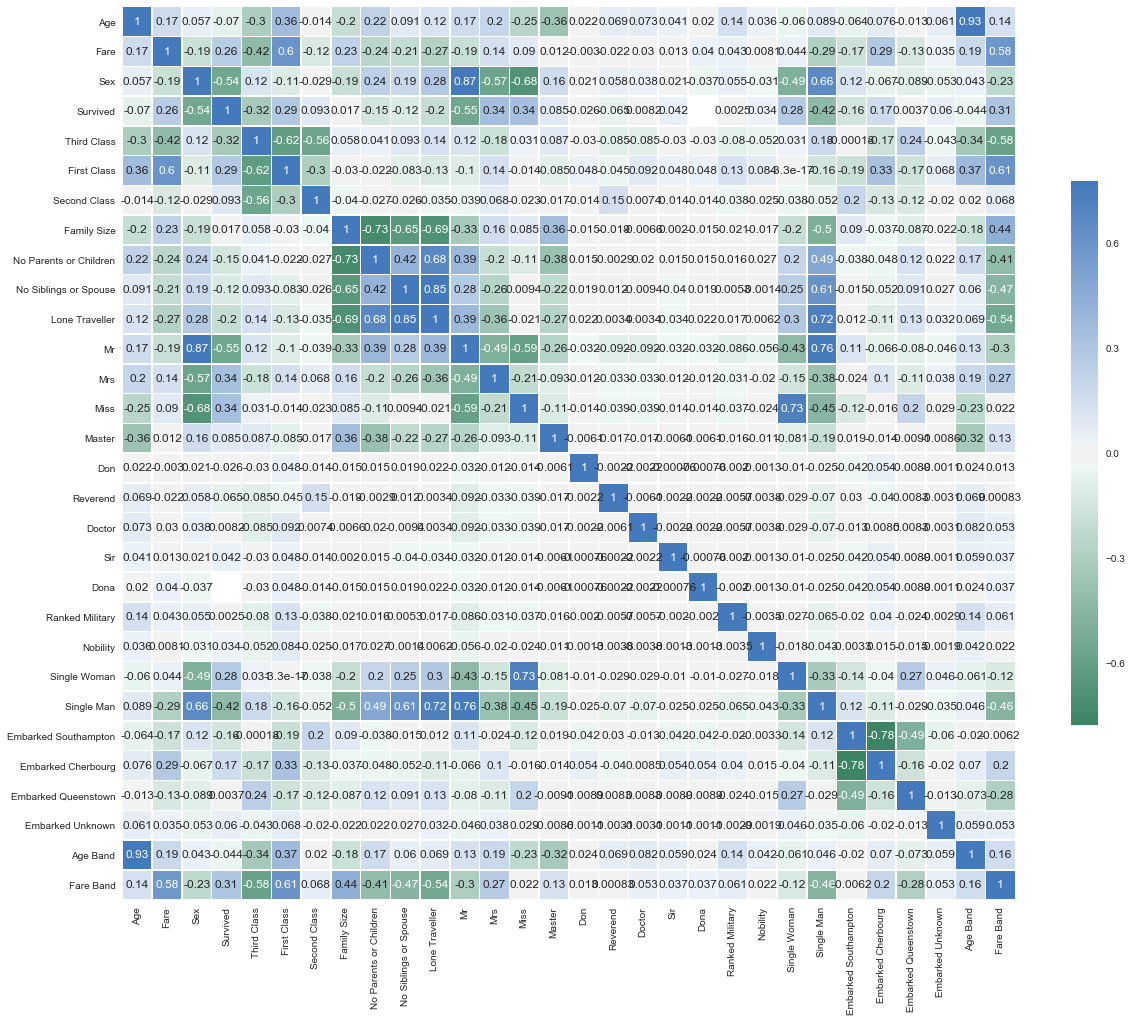

In [96]:
corr = full.corr()
plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);

This tells us that the majority of the features that we created, tell us something interesting towards survival.

As for the features to remove, I will wait until modelling for this as some techniques can verify this automatically. I am also interested to keep all thhe features in the model to understand the top contributing variables.

Using this, I can attempt to create some interaction variables to finish the feature engineering.

Looking at the features which correlate highly with Survival, the two numerical columns that would make sense to create an interaction variable from would be Age and Fare. 

In [97]:
full['Age*Fare'] = full['Age']*full['Fare']

del full['Age']
del full['Fare']

full['Age*Fare'].corr(full['Survived'])

0.22191924261423815

From this correlation, we can see that this new interaction feature correlates highly with survival, so this justifies its creation.

# Predictive Modelling

### First importing the algorithms

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Then, I will split my full dataset into the training and test samples. I will cut the target feature "Survival" from both and create a y column as my target for training. You can see from the shape that we now have 28 features to predict survival.

In [99]:
train = full[:891]
test = full[891:]

x_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

x_test = test.drop('Survived', axis = 1)

x_train.shape, y_train.shape, x_test.shape

((891, 28), (891,), (418, 28))

Now that my data is ready and I have imported my intended algorithms to use, the next stage is to run the algorithms against the training data, then test them for accuracy.

As you may have seen from the imported packages, the algorithms that I have chosen for this classification task are:
- Logistic Regression
- Support Vector Machine
- Random Forest
- K Nearest Neighbours
- Gaussian Naive Bayes
- Perceptron
- Stochastic Gradient Descent
- Decision Tree

The results from the models will be compared and presented in a table. The model with the highest overall accuracy will be considered the best for this task.

In [100]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
log_pred = model.predict(x_test)
acc_log = round(model.score(x_train, y_train) * 100, 5)
acc_log

# SVM
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 5)
acc_svc

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 5)
acc_knn

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gaussian_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 5)
acc_gaussian

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
perceptron_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 5)
acc_perceptron

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
linear_svc_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 5)
acc_linear_svc

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 5)
acc_sgd

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 5)
acc_decision_tree

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 5)
acc_random_forest

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.31650
8,Decision Tree,98.31650
0,Support Vector Machines,89.00112
2,Logistic Regression,83.16498
1,KNN,82.26712
4,Naive Bayes,79.23681
7,Linear SVC,70.93154
5,Perceptron,39.05724
6,Stochastic Gradient Descent,38.94501


In [101]:
print(random_forest_pred)

[ 0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  1.
  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  0.  1.  1.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.
  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.
  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1

From the table, we can see the Random Forest and Decision Tree performed the best, with an accuracy of 98.3165%!

However, with all machine learning problems it is often more suitable and desirable to have less features in the model. IN our case, we have 28, and from the correlation matrix, it looks like there may be some mulitcollinearity. 

In order to overcome this, I will perform some feature reduction techniques to decide which ones to remove from the modelling. 

The three techniques I will use are:
- Feature extraction using univariate statistical tests (chi-squared)
- Feature extraction with RFE
- Extracting important features using a Tree model

Firstly, I will perform the chi-squared test, to show significance of two features. The output will be the scores for each feature, the higher the score the more important it is in the dataset. I have then organised this in a crosstab.

In [102]:
# univariate selection using chi squared

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(x_train, y_train)
# summarize scores
np.set_printoptions(precision=3)

scores = pd.DataFrame({'Columns': x_test.columns.values, 'Score': fit.scores_})
scores.sort_values(by='Score', ascending=False)

,Columns,Score
27,Age*Fare,140367.620905
8,Mr,112.805785
0,Sex,92.702447
9,Mrs,89.474177
20,Single Man,88.941662
10,Miss,79.531749
19,Single Woman,60.735586
2,First Class,55.175151
26,Fare Band,41.556745
1,Third Class,41.553071


We can see that some features have a very high score, such as the interaction feature we created. But some have very low scores too such as Dona.

Next, let's see how RFE performs. We have chosen the desired number of columns to be 10, therefore the 10 most important features to include, according to RFE, will be given a score of 1. The other columns outside of the desired range, will be given numbers 2 onwards.

In [103]:
# RFE

# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(x_train, y_train)

print(rfe.support_)
print(rfe.ranking_)

scores = pd.DataFrame({'Columns': x_test.columns.values, 'Score': rfe.ranking_})
scores.sort_values(by='Score', ascending=True)

[ True  True  True False False False False False  True  True  True  True
  True  True False False False False False False False False  True False
 False False False False]
[ 1  1  1  5  2  8 14 11  1  1  1  1  1  1  9  4 19 10 17 15 16 13  1  7 12
  6  3 18]


,Columns,Score
0,Sex,1
22,Embarked Cherbourg,1
12,Don,1
11,Master,1
10,Miss,1
9,Mrs,1
8,Mr,1
13,Reverend,1
2,First Class,1
1,Third Class,1


The final method will be to use a Trees model. The output will show an importance score, the higher this score, the more importan the feature.

In [104]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

scores = pd.DataFrame({'Columns': x_test.columns.values, 'Score': model.feature_importances_})
scores.sort_values(by='Score', ascending=False)

,Columns,Score
27,Age*Fare,0.331688
0,Sex,0.118420
20,Single Man,0.068609
26,Fare Band,0.061262
10,Miss,0.053914
1,Third Class,0.047806
4,Family Size,0.047520
25,Age Band,0.039352
8,Mr,0.036815
2,First Class,0.034589


Once again, we can see varying scores for the features here.

Now we have the task of deciding which features to keep, and which to remove. We currently have 28 features, of which some are not very important at all. From analysing the results of the above, it seems sensible to attempt to reduce the number of features down to 10.

The way I reduced it down to 10, is simply taking the 10 highest ranking features from each of the feature selection techniques, and re-running the models with this reduced dataset.

I did this for each of the three lists produced by the feature selection techniques. Below I have presented the best performing lost of 10, which used the top 10 features produced by the univariate statistical tests. First, I had to remove the excess features to leave the top 10 features in the dataset.

In [105]:
columns = ['Embarked Cherbourg', 'Lone Traveller', 'Master', 'Second Class', 'Embarked Southampton', 
           'No Parents or Children', 'No Siblings or Spouse', 'Reverend', 'Embarked Unknown', 'Sir', 'Nobility', 
           'Don', 'Age Band', 'Family Size', 'Doctor', 'Embarked Queenstown', 'Ranked Military', 'Dona']

full.drop(columns, inplace=True, axis=1)

print(full.columns.values)

['Sex' 'Survived' 'Third Class' 'First Class' 'Mr' 'Mrs' 'Miss'
 'Single Woman' 'Single Man' 'Fare Band' 'Age*Fare']


Then I split the dataset again into training and test samples, along with my training target column. Now I am ready to model the algorithms again. Notice the shape of the samples.

In [106]:
train = full[:891]
test = full[891:]

x_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

x_test = test.drop('Survived', axis = 1)

x_train.shape, y_train.shape, x_test.shape

((891, 10), (891,), (418, 10))

Just like before, I will run the exact same algorithms but now against this reduced dataset. I have presented the results in a crosstab.

In [107]:
#Logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
acc_log = round(model.score(x_train, y_train) * 100, 5)
acc_log

#SVC
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 5)
acc_svc

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 5)
acc_knn

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 5)
acc_gaussian

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 5)
acc_perceptron

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 5)
acc_linear_svc

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 5)
acc_sgd

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 5)
acc_decision_tree

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 5)
acc_random_forest

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.31650
8,Decision Tree,98.31650
0,Support Vector Machines,91.02132
1,KNN,81.59371
2,Logistic Regression,79.79798
4,Naive Bayes,78.11448
7,Linear SVC,66.66667
6,Stochastic Gradient Descent,61.61616
5,Perceptron,39.61841


Interestingly, the scores of the 2 highets performing models stay the same. This may be because they have their own inbuilt dimension reduction techniques. However, the scores of the proceeding models have changed too, some increased by a significant amount. From playing around with the features in the dataset, I noticed that the top 2 always stayed the same, however the others shifted around with varying degrees.